In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vega import VegaLite
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [2]:
# import data from source:
data = pd.read_csv('../data_sources/Olympic_history/data/athlete_events.csv')

## Topic 1 Femal particpation

In [3]:
# Filter data:
summer = data[data.Season == "Summer"]
summer.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
19616,10351,Katarna Bereov,F,28.0,162.0,49.0,Slovakia,SVK,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,NaN
265152,132698,Meade Walker Yates,M,40.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Golf,Golf Men's Individual,NaN
99362,50295,Raili Hillevi Hoviniemi (-Lampinen),F,16.0,157.0,52.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Floor Exercise,NaN
73522,37363,Oscar Frh,M,32.0,NaN,NaN,Switzerland,SUI,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,NaN
31879,16379,"William ""Bill"" Buller",M,43.0,177.0,66.0,Ireland,IRL,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN


In [4]:
unique_year = summer.Year.unique()
unique_year.sort()
unique_year

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016])

In [5]:
sex_list=[]
year_list=[]
frequency_list = []
for year in unique_year:
    a = summer[summer.Year == year]
    frequency_list.extend([len(a[a.Sex=="M"]), len(a[a.Sex=="F"])])
    sex_list.extend(("M", "F"))
    year_list.extend([year, year])
year_sex_frequency_list = list(zip(year_list, sex_list,frequency_list)) 
year_sex_frequency = pd.DataFrame(year_sex_frequency_list, columns = ['Year', 'Sex','Frequency'])
year_sex_frequency.head(5)
year_sex_frequency.tail(5)

,Year,Sex,Frequency
53,2008,F,5816
54,2012,M,7105
55,2012,F,5815
56,2016,M,7465
57,2016,F,6223


In [6]:
percentage_list = []
participation_list = []
for year in unique_year:
    a = year_sex_frequency[year_sex_frequency.Year == year]
    frequency_total = sum(a["Frequency"])
    for row in a["Frequency"]:
        percentage_list.append(row/frequency_total)
        participation_list.append(row/frequency_total * 100)
year_sex_frequency["Percentage_decimal"] = percentage_list
year_sex_frequency["Percentage"] = (year_sex_frequency.Percentage_decimal*100).round(1).astype(str) + '%'
sexpercentage = year_sex_frequency
sexpercentage.Percentage_decimal = sexpercentage.Percentage_decimal.round(3)
sexpercentage.tail(5)

,Year,Sex,Frequency,Percentage_decimal,Percentage
53,2008,F,5816,0.428,42.8%
54,2012,M,7105,0.550,55.0%
55,2012,F,5815,0.450,45.0%
56,2016,M,7465,0.545,54.5%
57,2016,F,6223,0.455,45.5%


In [7]:
year_sex_percentage = pd.read_csv("../output/year_sex_percentage.csv")

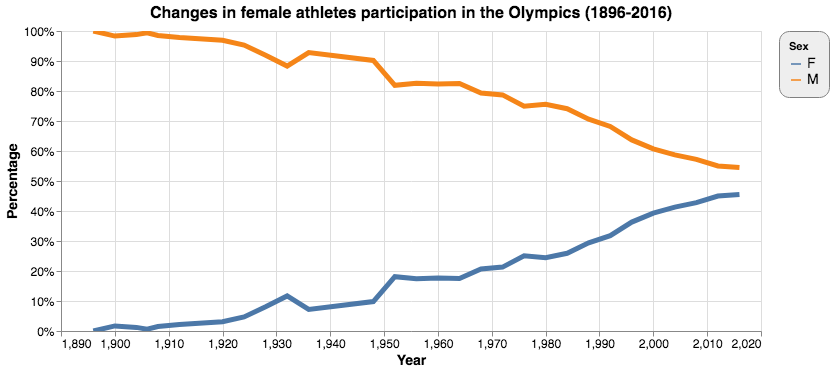

In [8]:
source = year_sex_percentage 

alt.Chart(source, title = 'Changes in female athletes participation in the Olympics (1896-2016)').mark_line(
    size=5
).encode(
    x=alt.X('Year:Q',title='Year'),
    y= alt.Y('Percentage_decimal', axis=alt.Axis(format='%', title='Percentage')),
    color='Sex',
    tooltip=['Year','Sex', 'Percentage']
).interactive().properties(
    width=700,
    height=300).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

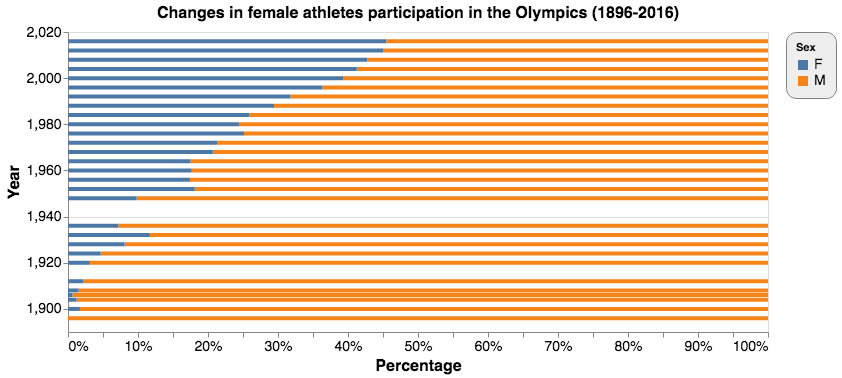

In [9]:
source = year_sex_percentage

alt.Chart(source, title = 'Changes in female athletes participation in the Olympics (1896-2016)').mark_bar(size=4).encode(
    x=alt.X('sum(Frequency)', stack="normalize", axis=alt.Axis(format='%', title='Percentage',grid=False)),
    y=alt.Y('Year:Q',title='Year'),
    color=alt.Color('Sex'),
    tooltip=['Year', 'Sex', 'Percentage'],
    order=alt.Order(
    'Sex',
    sort='ascending')).interactive().properties(
    width=700,
    height=300).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)


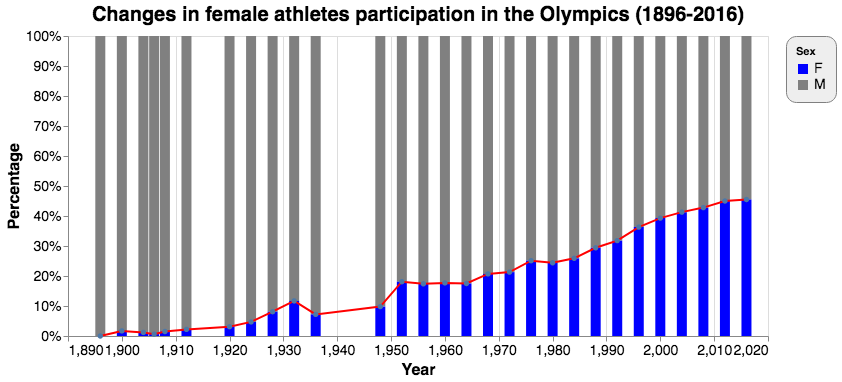

In [10]:
source = year_sex_percentage

base=alt.Chart(source).encode(x='year')

domain=["F","M"]
# scl=["#D190B6","#51B2E5"]
scl=["blue","grey"]
bar=alt.Chart(source, 
              title='Changes in female athletes participation in the Olympics (1896-2016)'
             ).mark_bar(size=10).encode(
    x=alt.X('Year:Q', title='Year'),
    y=alt.Y('sum(Frequency):Q', stack="normalize", 
            axis=alt.Axis(format='%', 
                          title='Percentage', grid=False)
           ),
    color=alt.Color('Sex', scale=alt.Scale(domain=domain, range=scl)),order=alt.Order(
    'Sex',
    sort='ascending'),
    tooltip=['Year','Sex','Percentage'],
)

line= alt.Chart(source[source.Sex=="F"]).mark_line(point=True,color='red').encode(
    x=alt.X('Year',title='Year'),
    y='Percentage_decimal'
)
alt.layer(bar+line).properties(
    width=700,
    height=300).configure_title(
    fontSize=20).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

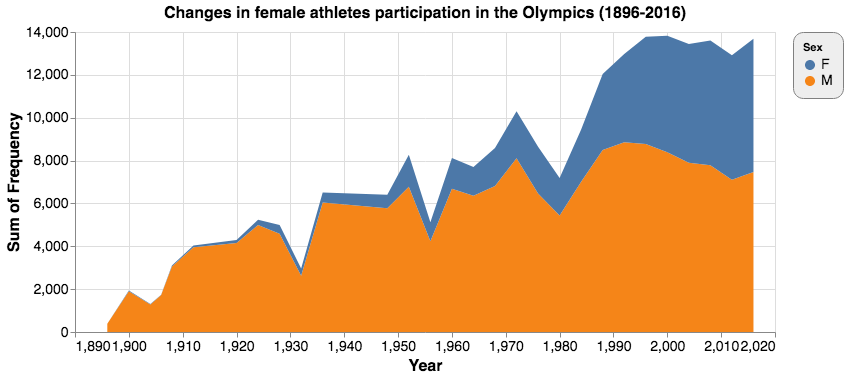

In [11]:
source = year_sex_percentage

alt.Chart(source, title = 'Changes in female athletes participation in the Olympics (1896-2016)'
         ).mark_area().encode(
    x="Year:Q",
    y="sum(Frequency):Q",
    color="Sex:N",
    tooltip=['Year', 'Sex', 'Percentage']
).interactive().properties(
    width=700,
    height=300).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

In [12]:
continent=pd.read_csv('../output/continent_percentage_tidy.csv')
continent.head()

,Year,Continent,Female_Percentage,Female Percentage
0,1896,Global,0.000000,0.0%
1,1900,Global,0.016046,1.6%
2,1904,Global,0.012308,1.2%
3,1906,Global,0.006490,0.6%
4,1908,Global,0.015568,1.6%


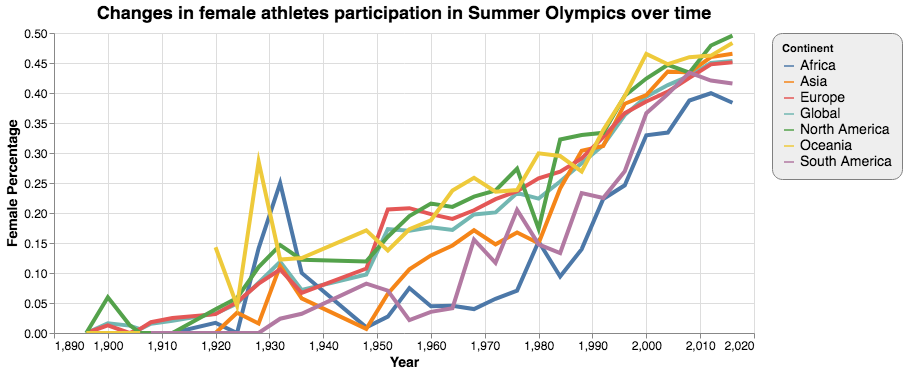

In [13]:
alt.Chart(continent, title='Changes in female athletes participation in Summer Olympics over time'
         ).mark_line(
    size = 4).encode(
    x='Year',
    y=alt.Y('Female_Percentage',title='Female Percentage'),
    color='Continent',
    tooltip=['Year', 'Continent', 'Female Percentage']
).interactive().properties(
    width=700,
    height=300).configure_title(
    fontSize=18,
    anchor='middle',
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

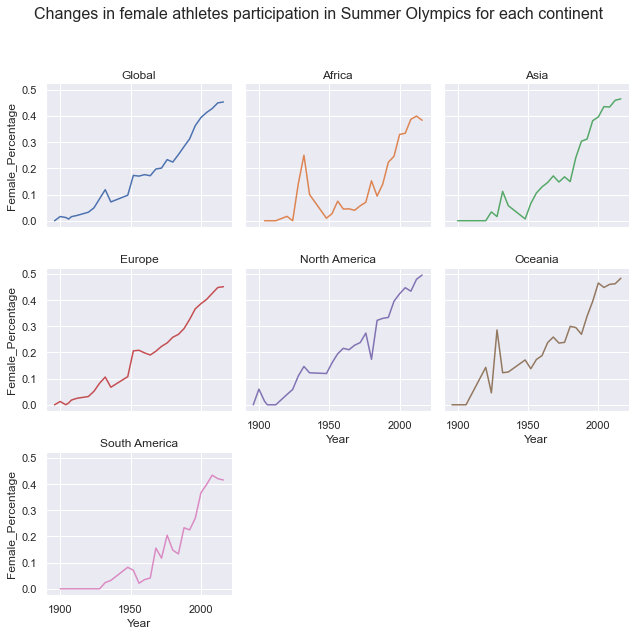

In [14]:
sns.set()

# Create a grid : initialize it
fig = sns.FacetGrid(continent, col='Continent', hue='Continent', col_wrap=3, )

# Add the line over the area with the plot function
fig = fig.map(plt.plot, 'Year', 'Female_Percentage').set_titles("{col_name} Continent")

# Control the title of each facet
fig = fig.set_titles("{col_name}")

plt.subplots_adjust(top=0.86)
fig = fig.fig.suptitle('Changes in female athletes participation in Summer Olympics for each continent', fontsize=16)
plt.savefig('../output/vis/g-2-2')

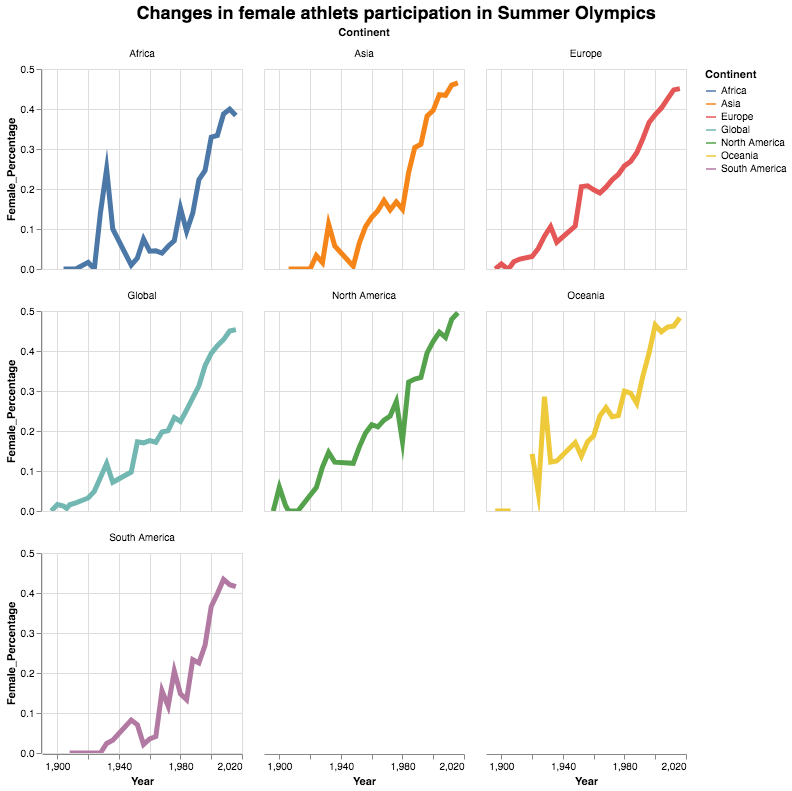

In [15]:
source = continent
alt.Chart(source, title='Changes in female athletes participation in Summer Olympics for each continent'
         ).mark_line(size = 5).encode(
    x='Year:Q',
    y='Female_Percentage:Q',
    color='Continent:N',
    tooltip=['Year', 'Continent', 'Female Percentage']
).interactive().properties(
    width=200,
    height=200
).facet(
    facet='Continent:N',
    columns=3,
    title="Changes in female athlets participation in Summer Olympics",
).configure_title(
    fontSize=18,
    anchor='middle'
)

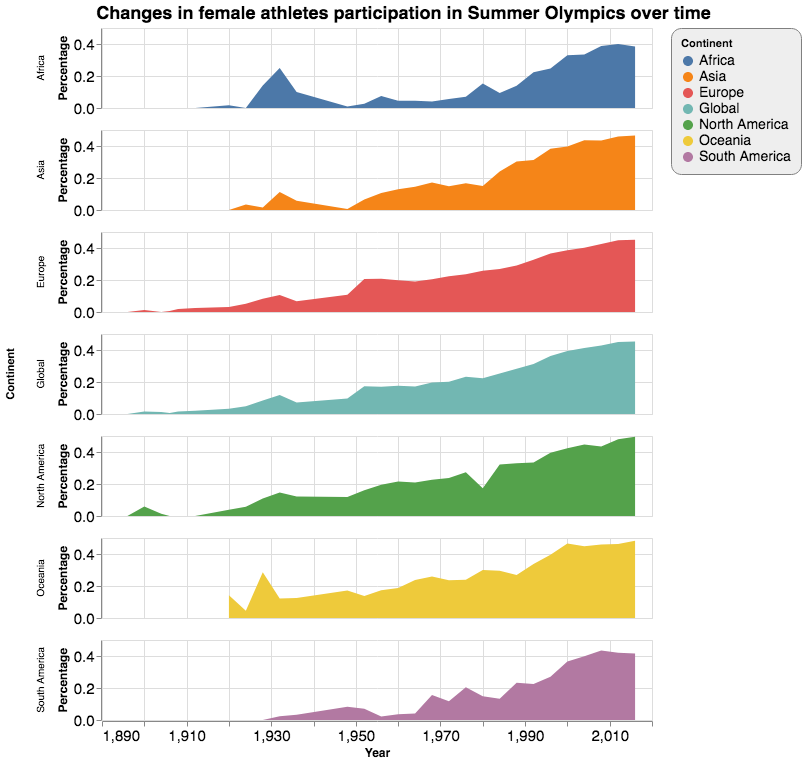

In [16]:
source = continent
alt.Chart(source, title='Changes in female athletes participation in Summer Olympics over time'
         ).transform_filter(
    alt.datum.symbol != 'GOOG'
).mark_area().encode(
    x='Year:Q',
    y=alt.Y('Female_Percentage:Q', title="Percentage"),
    color='Continent:N',
    row=alt.Row('Continent:N'),
    tooltip=['Year', 'Continent', 'Female Percentage']
).interactive().properties(height=80, width=550).configure_title(
    fontSize=18,
    anchor='middle',
).configure_axis(
    labelFontSize=15,
    titleFontSize=12
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

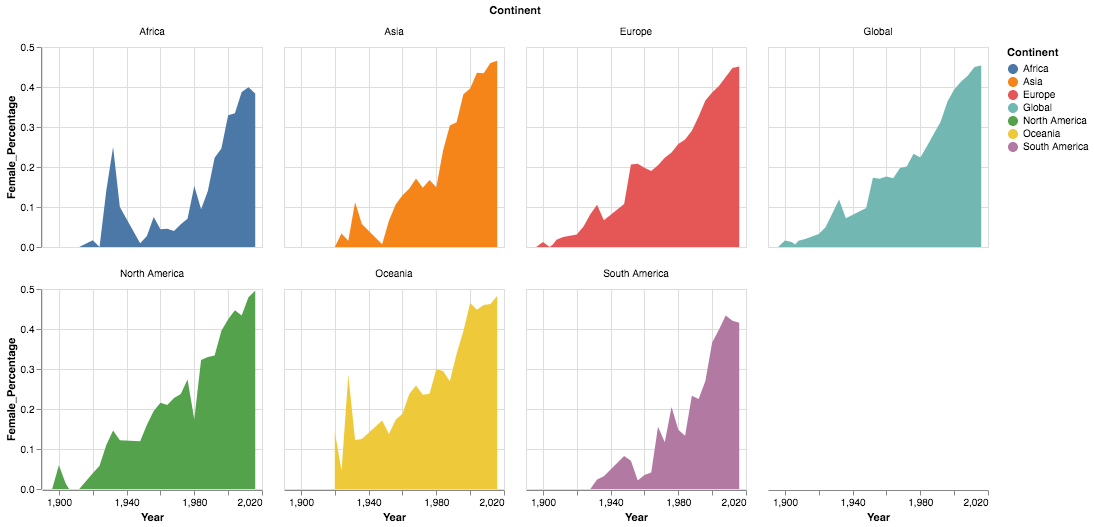

In [17]:
source = continent
alt.Chart(continent).mark_area().encode(
    x='Year:Q',
    y='Female_Percentage:Q',
    color='Continent:N',
    tooltip=['Year', 'Continent', 'Female Percentage']
).interactive().properties(
    width=220,
    height=200
).facet(
    facet='Continent:N',
    columns=4,
)

<Figure size 1080x1080 with 0 Axes>

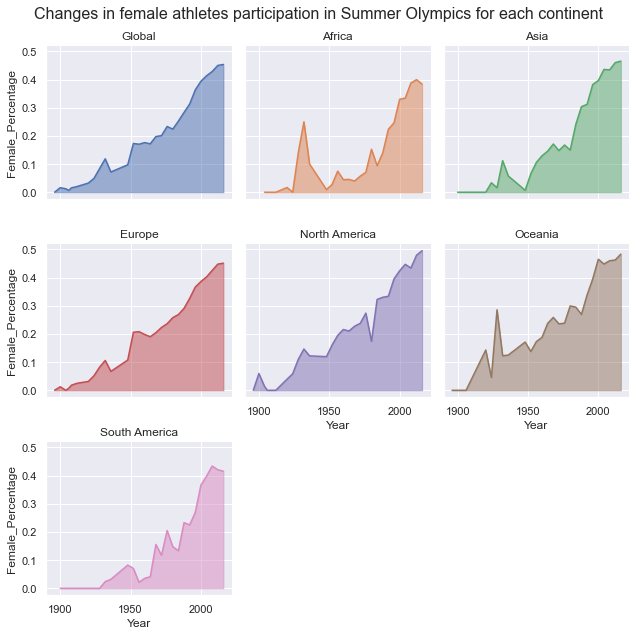

In [18]:
plt.figure(figsize=(15,15))

# Create a grid : initialize it
g = sns.FacetGrid(continent, col='Continent', hue='Continent', col_wrap=3, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Female_Percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'Female_Percentage', alpha=0.5).set_titles("{col_name} Continent")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Changes in female athletes participation in Summer Olympics for each continent', fontsize=16)

plt.savefig('../output/vis/g-2-3')

In [19]:
continent_percentage_untidy = pd.read_csv("../output/continent_percentage_untidy.csv")
continent_percentage_untidy.head()

,Year,Global,Africa,Asia,Europe,North America,Oceania,South America
0,1896,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN
1,1900,0.016046,NaN,0.0,0.012528,0.059603,0.0,0.0
2,1904,0.012308,0.0,NaN,0.000000,0.013605,0.0,NaN
3,1906,0.006490,0.0,0.0,0.006905,0.000000,0.0,NaN
4,1908,0.015568,0.0,0.0,0.018001,0.000000,NaN,0.0


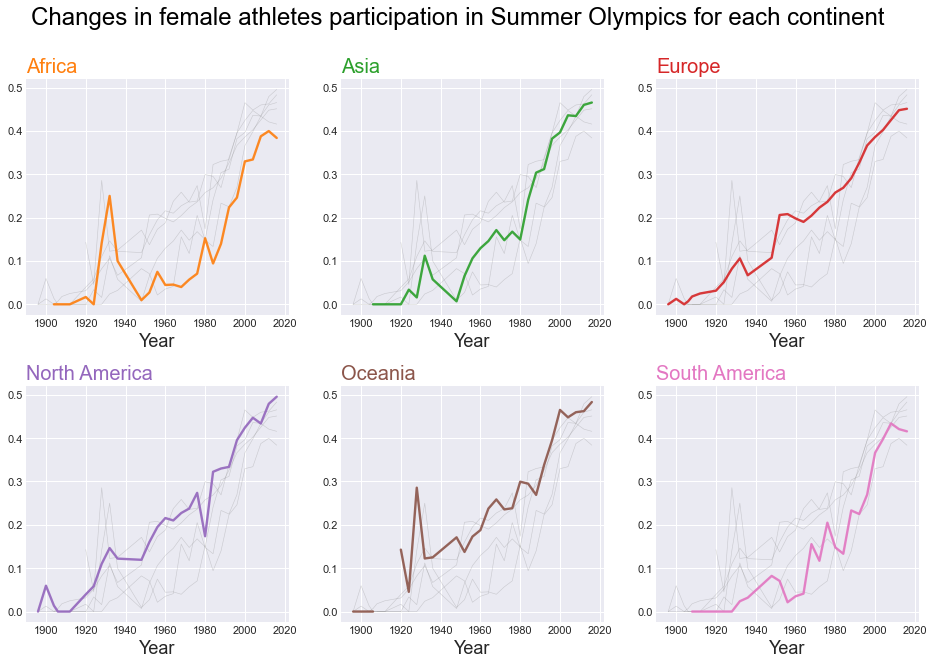

In [26]:
df4 = continent_percentage_untidy

plt.figure(figsize=(16,10))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab10')
 
# multiple line plot
num=0
for column in df4.drop(['Year', 'Global'], axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df4.drop(['Year', 'Global'], axis=1):
        plt.plot(df4['Year'], df4[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
        plt.subplots_adjust(wspace=None, hspace=0.3)
 
    # Plot the lineplot
    plt.plot(df4['Year'], df4[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 

    # Add title
    plt.xlabel('Year', fontsize=18)
    plt.title(column, loc='left', fontsize=20, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("Changes in female athletes participation in Summer Olympics for each continent", 
             fontsize=24, fontweight=3, color='black', style='normal')

plt.savefig('../output/vis/g-2-5')

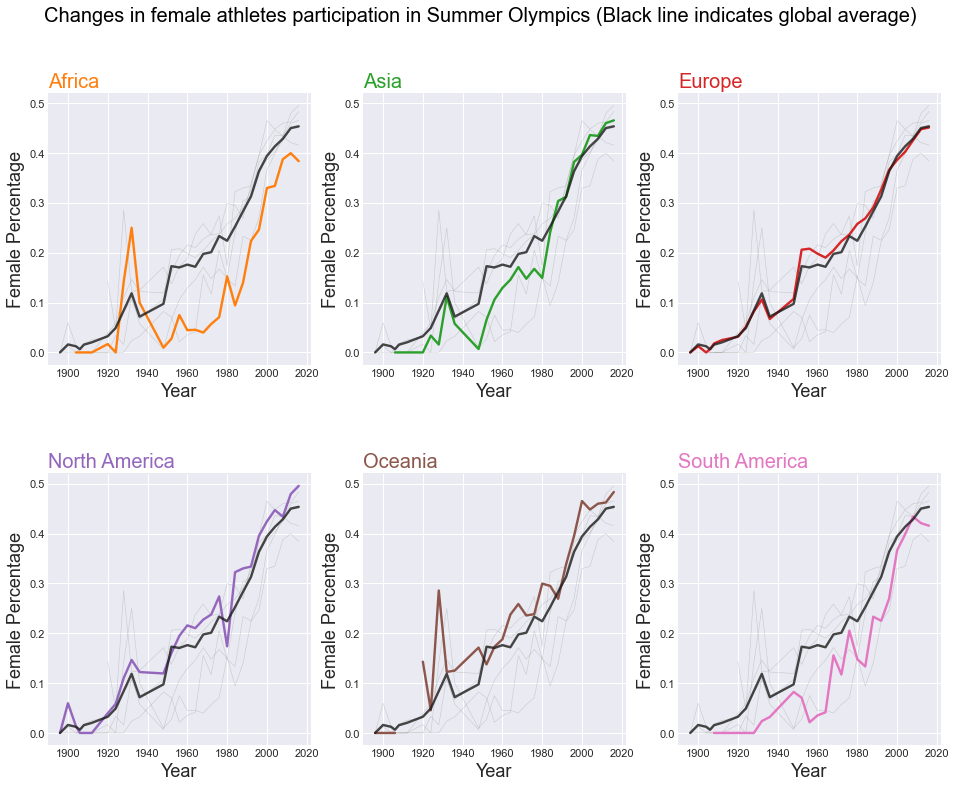

In [23]:
df4 = continent_percentage_untidy

plt.figure(figsize=(16,12))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab10')
 
# multiple line plot
num=0
for column in df4.drop(['Year', 'Global'], axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df4.drop(['Year', 'Global'], axis=1):
        plt.plot(df4['Year'], df4[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
        plt.subplots_adjust(wspace=None, hspace=0.4)
 
    # Plot the lineplot
    plt.plot(df4['Year'], df4[column], marker='', color=palette(num), linewidth=2.4, alpha=1, label=column)
    plt.plot(df4['Year'], df4['Global'], marker='', color='k', linewidth=2.4,alpha=0.8)

    # Add title
    plt.title(column, loc='left', fontsize=20, fontweight=20, color=palette(num) )
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Female Percentage', fontsize=18,rotation=90)
 
# general title
plt.suptitle("Changes in female athletes participation in Summer Olympics (Black line indicates global average)", fontsize=20, fontweight=3, color='black', style='normal')

plt.savefig('../output/vis/g-2-6.png')
